# 1.1)  Without Data NOrmalization / Standardization

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
import pandas as pd

In [116]:
data = pd.read_csv('/content/drive/My Drive/ISL/advertising.csv')

In [117]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [118]:
features = data[['TV', 'Radio', 'Newspaper']].values

## 3-D tsn3 visualization

In [119]:
from sklearn.manifold import TSNE

# Initialize t-SNE with desired parameters (e.g., perplexity and number of iterations)
tsne = TSNE(n_components=3, perplexity=30, n_iter=3000)

# Fit and transform the feature vectors to 3D using t-SNE
reduced_features = tsne.fit_transform(features)

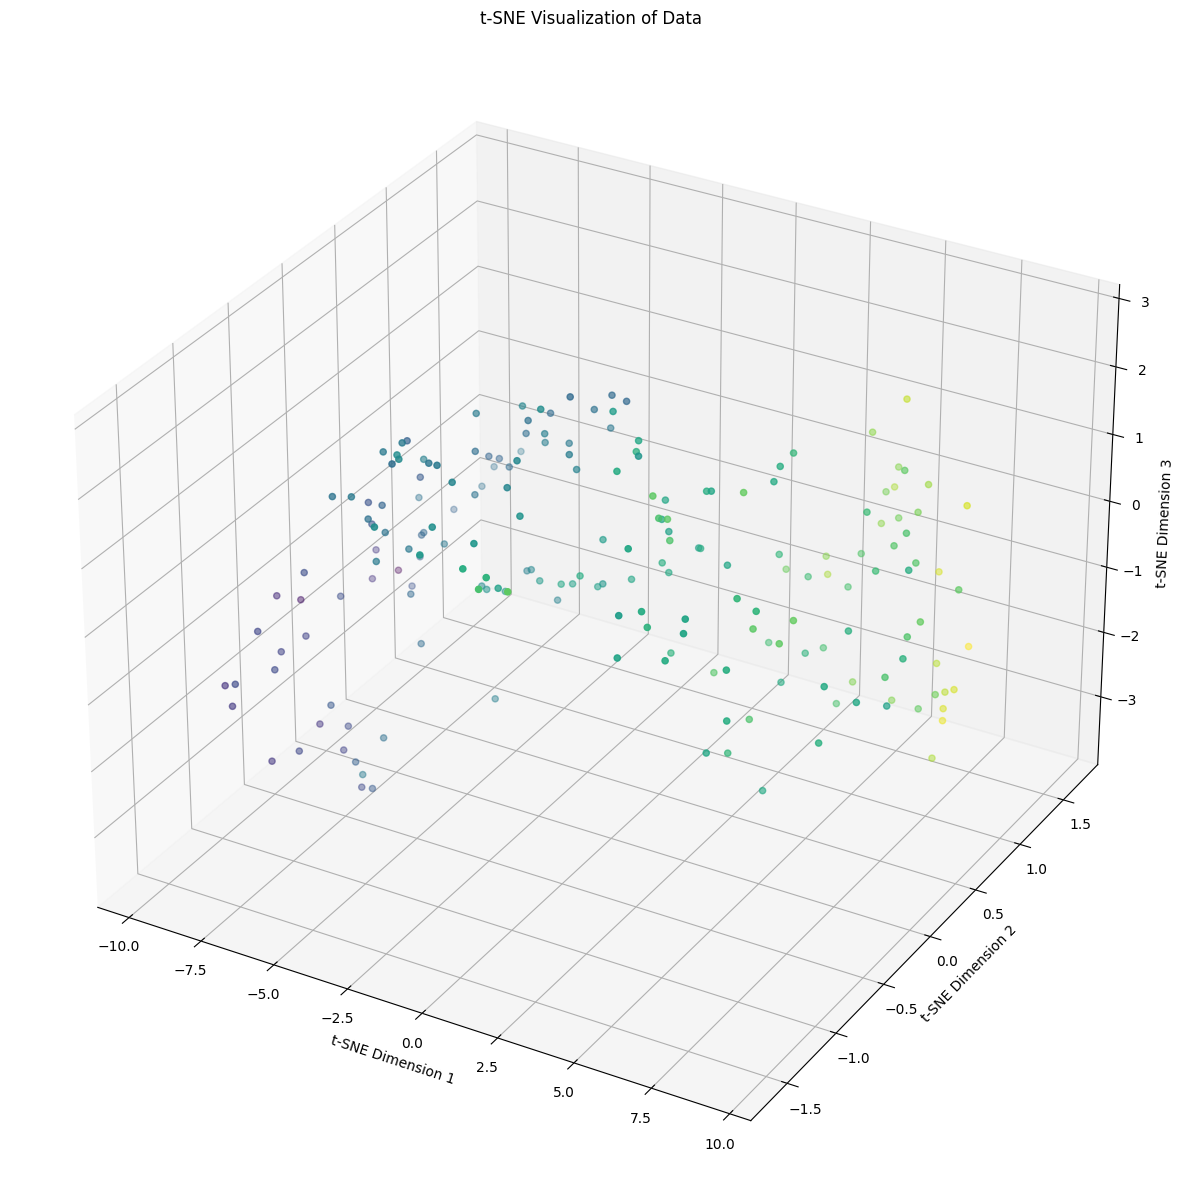

In [120]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(15,20))
ax = fig.add_subplot(111, projection='3d')

# Extract the sales values
sales = data['Sales'].values

# Plot the 3D scatter plot
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=sales, cmap='viridis')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
ax.set_title('t-SNE Visualization of Data')

# Show the plot
plt.show()


## 2-D tsne visualtion

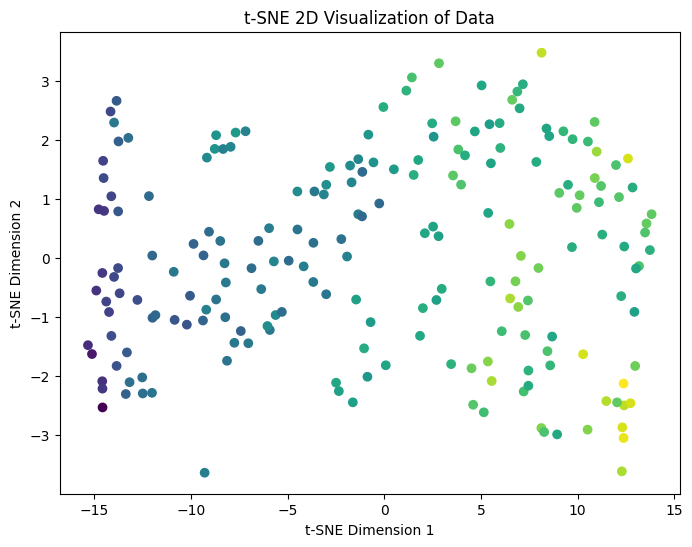

In [121]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)  # for 2D visualization

reduced_features = tsne.fit_transform(features)

# scatter plot for 2D visualization
plt.figure(figsize=(8, 6))


sales = data['Sales'].values

# Plot the 2D scatter plot
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=sales, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE 2D Visualization of Data')

plt.show()


## Modelling

In [122]:
#  Splitting the data into training and test data set , for this assignment taking the first 80 % samples as training and last 20 % as test data

total = len(features)

train_no = int( 0.8 * total )
test_no = total - train_no

X = features[0:train_no]
y = data['Sales'].values[0:train_no]

test_features = features[train_no : 201 ]
test_labels = data['Sales'].values[train_no : 201]


In [123]:
X.shape

(160, 3)

In [124]:
import numpy as np
# Padding of 1 to matrix X
ones = np.ones((X.shape[0], 1))
X_padded = np.hstack((X , ones))

## Linear Model without Regularization
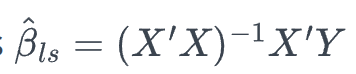

In [125]:
import numpy as np

In [126]:
#  As we know the parameter for linear regression if supposed as B then B = (X.T X) inv Xt y
X_padded = np.array(X_padded)
y = np.array(y)

B_linear = np.linalg.inv( X_padded.T @ X_padded ) @ ( X_padded.T @ y )
B_linear

array([5.47207688e-02, 1.04776019e-01, 3.06638052e-03, 4.48194957e+00])

In [127]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Get the coefficients (parameters)
intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 4.481949566663138
Coefficients: [0.05472077 0.10477602 0.00306638]


As we can see the coefficients values are exaclty same as the one calucated by inbuilt libraires

In [128]:
X_padded.shape

(160, 4)

## linear Model with regularizartion ( Ridge Regression )
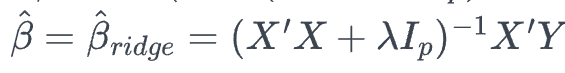

In [129]:
# As we know for Ridge regression the equarion looks like the above
lemda = 0.01
B_ridge = np.linalg.inv( X_padded.T @ X_padded + lemda * np.identity(4) ) @ ( X_padded.T @ y )

B_ridge


array([5.47259510e-02, 1.04799327e-01, 3.07865631e-03, 4.47996558e+00])

In [130]:
from sklearn.linear_model import Ridge
alpha = 0.01  # You can adjust the alpha value
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X, y)

# Get the coefficients (parameters)
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_

print("Intercept:", intercept)
print("Coefficients:", coefficients)


Intercept: 4.4819501842851786
Coefficients: [0.05472077 0.10477598 0.00306639]


As we can see the parameters are same for


> The one calculated statistically

> calculated with inbuilt libraires





## Computing errors

In [131]:
print(test_features.shape)
test_labels.shape


(40, 3)


(40,)

In [132]:
test_features = np.array(test_features)
test_labels = np.array(test_labels)

# padding test features with 1

ones = np.ones((test_features.shape[0] , 1))
test_features_padded = np.hstack((test_features , ones))


In [133]:
linear_pred_train = X_padded @ B_linear
ridge_pred_train = X_padded @ B_ridge

linear_pred_test = test_features_padded @ B_linear
ridge_pred_test = test_features_padded @ B_ridge


linear_train_error_1 = ((y -  linear_pred_train).T @ ( y -  linear_pred_train )) / ( 2 * ( X_padded.shape[0]))
ridge_train_error_1 =   ((y -  ridge_pred_train).T @ ( y -  ridge_pred_train )) / ( 2 * ( X_padded.shape[0]))

linear_test_error_1 = ((test_labels -  linear_pred_test).T @ ( test_labels -  linear_pred_test )) / ( 2 * ( test_features_padded.shape[0]))
ridge_test_error_1 = ((test_labels -  ridge_pred_test).T @ ( test_labels -  ridge_pred_test )) /  (2 * ( test_features_padded.shape[0]))



print("Linear Regression Training Error:", linear_train_error_1)
print("Ridge Regression Training Error:", ridge_train_error_1)
print("Linear Regression Testing Error:", linear_test_error_1)
print("Ridge Regression Testing Error:", ridge_test_error_1)

Linear Regression Training Error: 1.3671985804792106
Ridge Regression Training Error: 1.3671988581486008
Linear Regression Testing Error: 1.3184703580408181
Ridge Regression Testing Error: 1.3186815950080715


## Experimenting with different values of lemda


In [134]:
lemdas = [ 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.30, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.70, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.80, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.00 ,1.5 , 2 , 3 , 4 , 5 , 6 ,7  , 8 , 9 , 10 , 15 , 20 , 30 , 50 , 70 , 100 , 200 , 300 , 400 , 500 , 600 , 1000 ]
test_errors = []
train_errors = []
for lemda in lemdas:
  B_ridge = np.linalg.inv( X_padded.T @ X_padded + lemda * np.identity(4) ) @ ( X_padded.T @ y )

  pred = test_features_padded @ B_ridge
  test_error = ((( test_labels - pred).T)@ (test_labels - pred) ) / ( 2 * test_features_padded.shape[0])
  test_errors.append(test_error)

  pred = X_padded @  B_ridge
  train_error = ((( y - pred).T) @ ( y - pred) ) / ( 2 * X_padded.shape[0])
  train_errors.append(train_error)


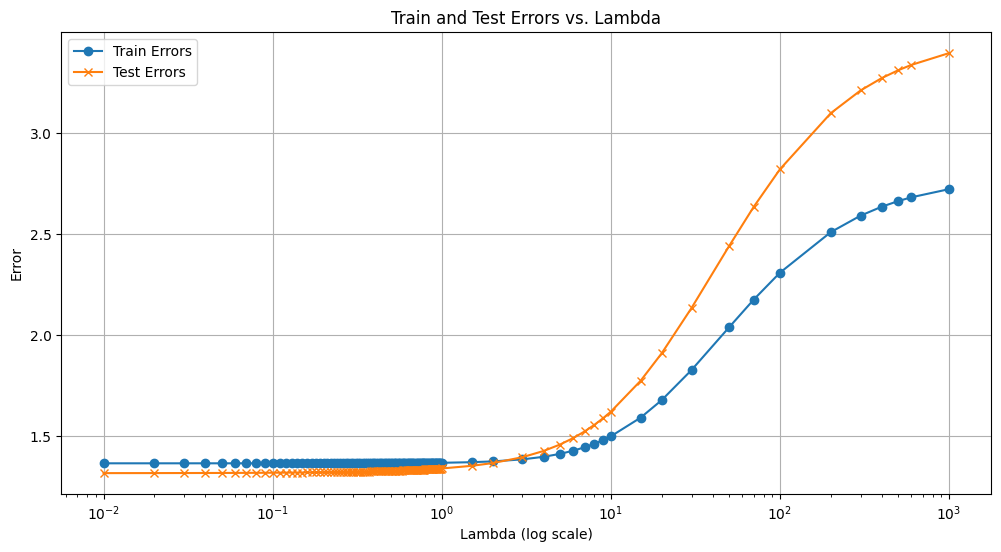

In [135]:
# Create the plot
plt.figure(figsize=(12, 6))
plt.plot((lemdas), train_errors, label='Train Errors', marker='o')
plt.plot((lemdas), test_errors, label='Test Errors', marker='x')
plt.xscale('log')  # To make the x-axis logarithmic
plt.xlabel('Lambda (log scale)')
plt.ylabel('Error')
plt.title('Train and Test Errors vs. Lambda')
plt.legend()
plt.grid(True)
plt.show()


#

# 1.2) With Normalization and standardizaion

In [136]:
min_vals = np.min(X, axis=0)  # Calculate the minimum values for each column
max_vals = np.max(X, axis=0)  # Calculate the maximum values for each column

min_vals_y = np.min(y , axis = 0 )
max_vals_y= np.max(y , axis=0)


In [137]:
X = (X - min_vals) / (max_vals - min_vals)
y =  (y - min_vals_y) / (max_vals_y - min_vals_y)

In [138]:
mean_vals = np.mean(X, axis=0)  # Calculate the mean values for each column
std_devs = np.std(X, axis=0)    # Calculate the standard deviations for each column


mean_vals_y = np.mean(y, axis=0)  # Calculate the mean values for each column
std_devs_y = np.std(y, axis=0)    # Calculate the standard deviations for each column


In [139]:
X = (X - mean_vals) / std_devs
y = ( y - mean_vals_y) /  std_devs_y

## 3-D tsne

In [140]:
from sklearn.manifold import TSNE

# Initialize t-SNE with desired parameters (e.g., perplexity and number of iterations)
tsne = TSNE(n_components=3, perplexity=30, n_iter=3000)

# Fit and transform the feature vectors to 3D using t-SNE
reduced_features = tsne.fit_transform(features)

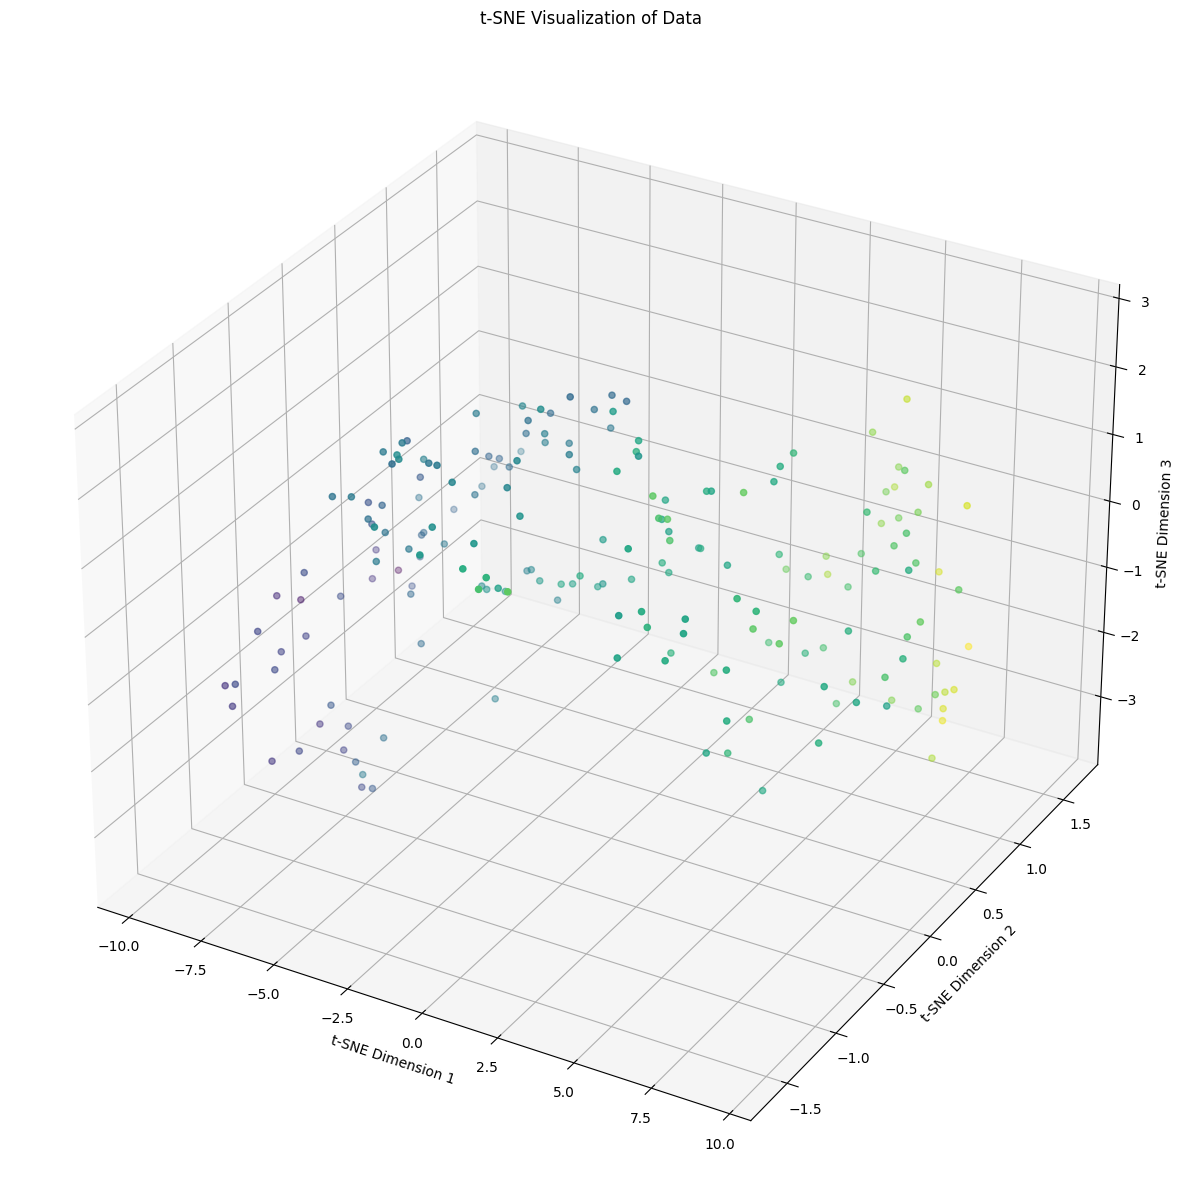

In [141]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(15,20))
ax = fig.add_subplot(111, projection='3d')

# Extract the sales values
sales = data['Sales'].values

# Plot the 3D scatter plot
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=sales, cmap='viridis')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
ax.set_title('t-SNE Visualization of Data')

# Show the plot
plt.show()


## PAdding of X


In [142]:
# Padding of 1 to matrix X
ones = np.ones((X.shape[0], 1))
X_padded = np.hstack((X , ones))

##Linear

In [143]:
X_padded = np.array(X_padded)
y = np.array(y)

B_linear = np.linalg.inv( X_padded.T @ X_padded ) @ ( X_padded.T @ y )
B_linear

array([8.86190469e-01, 2.90834750e-01, 1.27825629e-02, 3.88865703e-16])

## Ridge

In [144]:
# As we know for Ridge regression the equarion looks like the above
lemda = 0.01
B_ridge = np.linalg.inv( X_padded.T @ X_padded + (lemda * np.identity(4)) ) @ ( X_padded.T @ y )

B_ridge

array([8.86135872e-01, 2.90816822e-01, 1.27899138e-02, 3.88832274e-16])

## Comparison of erros

In [145]:
test_features = (test_features - min_vals) / (max_vals - min_vals)
test_features = (test_features - mean_vals) / std_devs

test_labels = (test_labels - min_vals_y) / (max_vals_y - min_vals_y)
test_labels = (test_labels - mean_vals_y) / std_devs_y
# padding test features with 1

ones = np.ones((test_features.shape[0] , 1))
test_features_padded = np.hstack((test_features , ones))


In [146]:
linear_pred_train = X_padded @ B_linear
ridge_pred_train = X_padded @ B_ridge

linear_pred_test = test_features_padded @ B_linear
ridge_pred_test = test_features_padded @ B_ridge


linear_train_error_2 = ((y -  linear_pred_train).T @ ( y -  linear_pred_train )) / ( 2 * ( X_padded.shape[0]))
ridge_train_error_2 =   ((y -  ridge_pred_train).T @ ( y -  ridge_pred_train )) / ( 2 * ( X_padded.shape[0]))

linear_test_error_2 = ((test_labels -  linear_pred_test).T @ ( test_labels -  linear_pred_test )) / ( 2 * ( test_features_padded.shape[0]))
ridge_test_error_2 = ((test_labels -  ridge_pred_test).T @ ( test_labels -  ridge_pred_test )) /  (2 * ( test_features_padded.shape[0]))



print("Linear Regression Training Error:", linear_train_error_2)
print("Ridge Regression Training Error:", ridge_train_error_2)
print("Linear Regression Testing Error:", linear_test_error_2)
print("Ridge Regression Testing Error:", ridge_test_error_2)

Linear Regression Training Error: 0.049144184358431243
Ridge Regression Training Error: 0.04914418603031624
Linear Regression Testing Error: 0.04739264015617485
Ridge Regression Testing Error: 0.04739197713322119


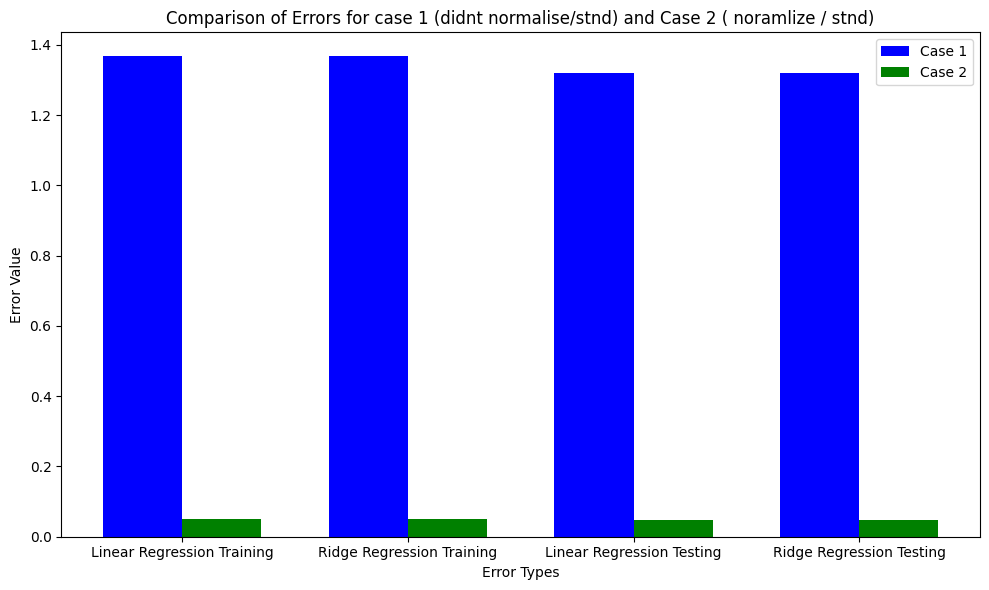

In [147]:
import matplotlib.pyplot as plt
import numpy as np

# Define the types of errors and the number of error types
error_types = ['Linear Regression Training', 'Ridge Regression Training', 'Linear Regression Testing', 'Ridge Regression Testing']
num_error_types = len(error_types)

# Define the two cases and their corresponding error values
cases = ['Case 1', 'Case 2']
error_values = np.array([
    [linear_train_error_1, ridge_train_error_1, linear_test_error_1, ridge_test_error_1],
    [linear_train_error_2, ridge_train_error_2, linear_test_error_2, ridge_test_error_2]
])

# Define colors for the bars for each case
colors = ['b', 'g']  # Blue for Case 1, Green for Case 2

# Set the width of each bar
bar_width = 0.35

# Create a list of x positions for the bars
x = np.arange(num_error_types)

# Create a grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))

for i, case in enumerate(cases):
    ax.bar(x + i * bar_width, error_values[i], bar_width, label=case, color=colors[i])

# Set labels, title, and legend
ax.set_xlabel('Error Types')
ax.set_ylabel('Error Value')
ax.set_title('Comparison of Errors for case 1 (didnt normalise/stnd) and Case 2 ( noramlize / stnd)')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(error_types)
ax.legend()

plt.tight_layout()
plt.show()


# 2) Logistic Regression

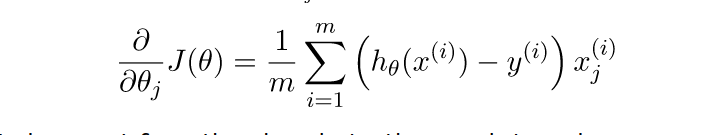

In [148]:
data = pd.read_csv("/content/drive/My Drive/ISL/banknote_authentication.csv")

In [149]:
data.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [150]:
data = data.values

In [151]:
split_ratio = 0.8


total_samples = len(data)
train_samples = int(total_samples * split_ratio)
test_samples = total_samples - train_samples


train_data = data[:train_samples]
test_data = data[train_samples:]





In [152]:
X = train_data[ : , : -1]
y = train_data[ : , -1]

test_X = test_data[ : , : -1]
test_y = test_data[ : , -1]


In [153]:
# padding the train data
ones = np.ones((X.shape[0] , 1))
X_padded = np.hstack((X , ones))
X_padded

array([[ 3.6216 ,  8.6661 , -2.8073 , -0.44699,  1.     ],
       [ 4.5459 ,  8.1674 , -2.4586 , -1.4621 ,  1.     ],
       [ 3.866  , -2.6383 ,  1.9242 ,  0.10645,  1.     ],
       ...,
       [ 2.0177 ,  1.7982 , -2.9581 ,  0.2099 ,  1.     ],
       [ 1.164  ,  3.913  , -4.5544 , -3.8672 ,  1.     ],
       [-4.3667 ,  6.0692 ,  0.57208, -5.4668 ,  1.     ]])

In [154]:
def sigm( x , theta):
  z = np.dot( x , theta)
  ep = np.exp(-z)
  return ( (1) / ( 1 + ep))

In [155]:
# padding test-X
ones  = np.ones((test_X.shape[0] , 1))
test_X_padded = np.hstack((test_X ,ones))


In [156]:
theta = [0 , 0 ,0 ,0 ,0 ]

In [ ]:
# gradient descent for the optimal parameters
alpha = 0.5
costs = []

iters = 1000


for i in range(iters):
  ptheta = theta
  for j in range(len(theta)):
    temp = 0;
    for xx, yy in zip(X_padded , y ) :
      fx = sigm(xx, ptheta)
      temp = temp + (( fx - yy ) * (xx[j]))
    temp /= (X_padded.shape[0])
    temp *= alpha
    theta[j] -= temp


  st = X_padded @ theta
  prob = ( (1) /( 1 + np.exp(-st)) )


  cost = 0
  for predd , yy in zip( prob , y ):
    if yy == 1:
      cost += -(np.log(predd))
    else:
      cost += -(np.log(1- predd))
  costs.append(cost)






In [ ]:
plt.plot(costs)
plt.title("Cost vs #iteration-> ")
plt.xlabel("no of iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
theta

In [ ]:

st = test_X_padded @ theta

prob = ( (1) /( 1 + np.exp(-st)) )
pred = ( prob >= 0.5).astype(int)


test_cost = 0 ;
for predd , yy in zip( prob , test_y ):
  if yy == 1:
    test_cost += -(np.log(predd))
  else:
    test_cost += -(np.log(1- predd))




print(test_cost)


In [ ]:
# defining accuracy as  correctly identified / total test

num = ( pred == test_y)
# num = np.array(num)

accuracy = np.count_nonzero(num) / (test_y.shape[0])
print(f"{accuracy} is the test accuracy")



st = X_padded @ theta

prob = ( (1) /( 1 + np.exp(-st)) )
pred_train = ( prob >= 0.5).astype(int)

num = ( pred_train == y)

accuracy = np.count_nonzero(num) / (y.shape[0])
print(f"{accuracy} is the train accuracy")



train_cost = 0 ;
for predd , yy in zip( prob , y ):
  if yy == 1:
    train_cost += -(np.log(predd))
  else:
    train_cost += -(np.log(1- predd))

print()
print(f"{train_cost} is the training cost" )
print(f"{test_cost} is the testing cost" )


As we can see the accuracy that we are getting is > 98 %

also the train error and train error are comparable hence it is a good and generalized model


## 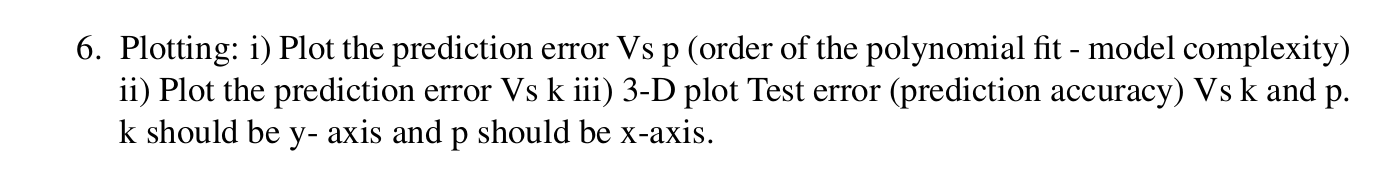

In [ ]:
import matplotlib.pyplot as plt

# Create a line plot connecting the points
plt.figure(figsize=(8, 6))
plt.plot(ps, pred_error_p, c='blue', marker='o', label='Line Plot with Markers', linestyle='-')

# Set labels and title
plt.xlabel('ps')
plt.ylabel('Prediction Error')
plt.title('order of the polynomial fit - model complexity   |   Line Plot of ps vs. Prediction Error ')

# Add markers to the points
plt.scatter(ps, pred_error_p, c='blue', marker='o')

# Add a grid
plt.grid(True)

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Create a line plot connecting the points
plt.figure(figsize=(8, 6))
plt.plot(ks, pred_error_k, c='blue', marker='o', label='Line Plot with Markers', linestyle='-')

# Set labels and title
plt.xlabel('ps')
plt.ylabel('Prediction Error')
plt.title('Line Plot of ks vs. Prediction Error')

# Add markers to the points
plt.scatter(ks, pred_error_k, c='blue', marker='o')

# Add a grid
plt.grid(True)

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

k, p = np.meshgrid(ks, ps)
test_errors = np.array(test_errors)
test_errors = test_errors.reshape( p.shape[0] , k.shape[0] )
# Create a 3D figure
fig = plt.figure(figsize= ( 15 , 12 ))
ax = fig.add_subplot(111, projection='3d')

# Create the surface plot
surface = ax.plot_surface(p, k, test_errors, cmap='viridis')

# Add labels and a colorbar
ax.set_xlabel('p')
ax.set_ylabel('k')
ax.set_zlabel('Test Errors')
plt.colorbar(surface, label='Test Error')

# Show the plot
plt.title('3D plot of test errro vs k and p ')
plt.show()


# 3) Understanding Bias Variance Trade off

## 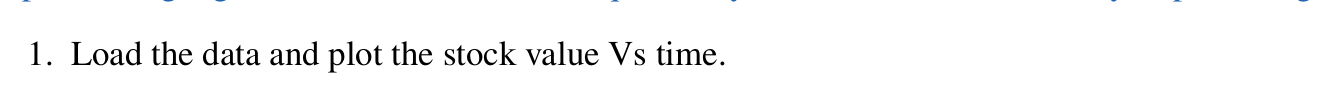

In [ ]:
data = pd.read_excel("/content/drive/My Drive/ISL/Apple_stock_data.xlsx")
data.head(5)

In [ ]:

df = data
df['Close/Last'].dtype

In [ ]:
# Convert the 'Date' column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Remove the '$' and convert the 'Close/Last' column to a numeric format (float)
df['Close/Last'] = df['Close/Last'].str.replace('$', '').astype(float)

In [ ]:
# df = df.iloc[ : 20 , :]
df.sort_values(by='Date', inplace=True)

In [ ]:

# Plotting the stock value vs. time
plt.figure(figsize=(20, 6))
plt.gca().set_facecolor('black')
# Scatter plot to highlight individual data points
plt.scatter(df['Date'], df['Close/Last'], marker='o', label='Data Point', color='red' , s = 0.3)

# Line plot connecting each point to the previous one
plt.plot(df['Date'], df['Close/Last'], linestyle='-', linewidth=1, color='yellow', alpha=0.5, label='Connecting Line')

plt.title('Stock Value vs. Time')
plt.xlabel('Date')
plt.ylabel('Stock Value ($)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.legend()

plt.show()


##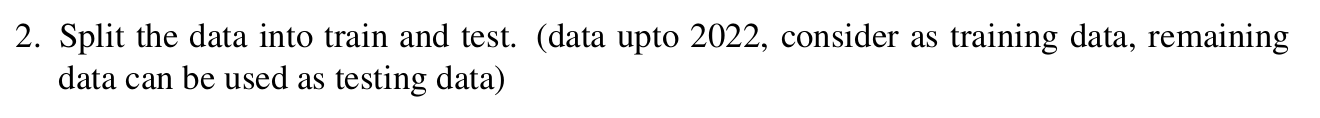

In [ ]:
train_data = df[df['Date'] <= '2022-12-31']  # Data up to the end of 2022
test_data = df[df['Date'] > '2022-12-31']    # Data from 2023 onwards

train_data.shape

In [ ]:
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

train_data.shape

In [ ]:
df.head(5)

## 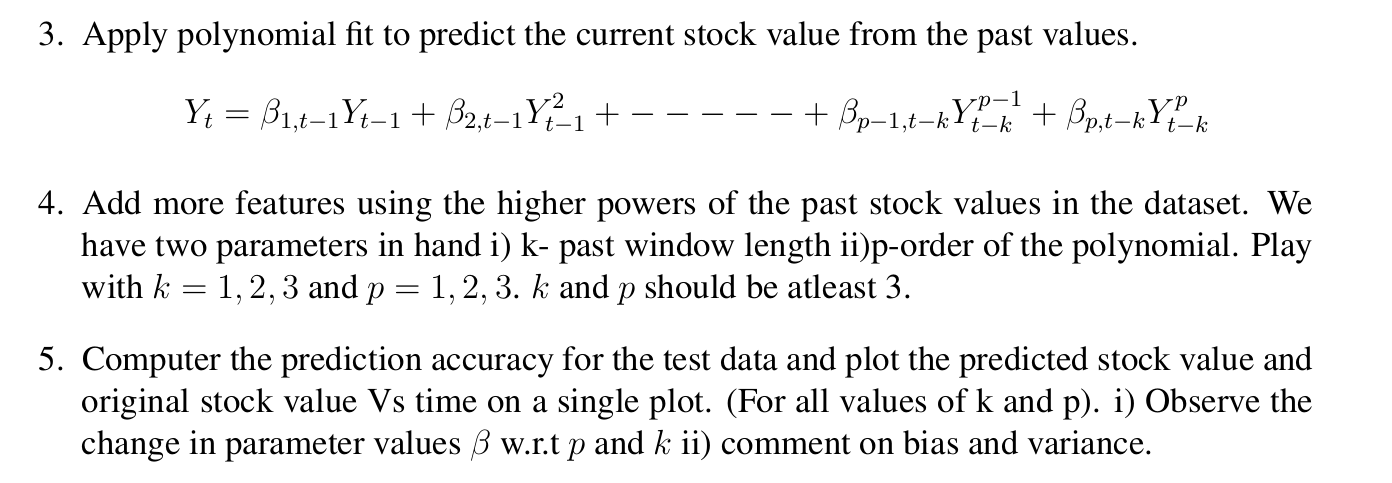

In [ ]:
def plotfig( y , pred , k , p ):
    plt.figure(figsize=(10, 6))
    plt.plot(y, label='Original Stock Values', color='blue')

    # Plot the predicted values
    plt.plot(pred, label=f'Predicted Values (k={k}, p={p})', color='red')

    # Add labels and legend
    plt.xlabel('Time')
    plt.ylabel('Stock Value')
    plt.title(f'Predicted vs. Original Stock Values (k={k}, p={p})')
    plt.legend()
    plt.show()



In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



# Define ks and ps
ks = [3, 4, 5, 7, 9, 10]
ps = [3, 4, 5, 6, 8, 10]

# taking three cases
# k = 3 , p = 3 i.e high bias
# k = 5 , p= 5 i.e. generalized
# k = 10 , p = 10 , i.e. high variance

k3p3_test = np.array([])
k3p3_train = np.array([])
k5p5_test = np.array([])
k5p5_train = np.array([])
k10p10_test = np.array([])
k10p10_train = np.array([])

te =[]
tse = []

pred_error_p = []
pred_error_k = []



thetas = [ [] ]

test_errors = []
train_errors = []



for k in ks:
    for p in ps:

        X_train = np.zeros((len(train_data) - k, p))
        y_train = train_data['Close/Last'][k:]

        X_test = np.zeros((len(test_data) - k, p))
        y_test = test_data['Close/Last'][k:]

        for kk in range(k):
            for pp   in range(p):
                X_train[:, pp] = train_data['Close/Last'][k - kk - 1:-kk - 1] ** (pp + 1)
                X_test[:, pp] = test_data['Close/Last'][k - kk - 1:-kk - 1] ** (pp + 1)

        # Fit the model
        theta = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)


        pred_train = X_train @ theta
        pred_test = X_test @ theta

        # errors
        squared_diff_train = (y_train - pred_train) ** 2
        train_error = np.mean(squared_diff_train)

        squared_diff_test = (y_test - pred_test) ** 2
        test_error = np.mean(squared_diff_test)

        train_errors.append(train_error)
        test_errors.append(test_error)

        print(f"k = {k}, p = {p}")
        print(f"Training error: {train_error}")
        print(f"Testing error: {test_error}")

        plotfig(y_test , pred_test , k , p  )
        plotfig(y_train , pred_train , k , p)

        if k == 3 and p == 3 :
          k3p3_test = pred_test
          k3p3_train = pred_train
          te.append(train_error)
          tse.append(test_error)

        if k == 5 and p == 5:
          k5p5_test = pred_test
          k5p5_train = pred_train
          te.append(train_error)
          tse.append(test_error)


        if k == 10 and p == 10:
          k10p10_test = pred_test
          k10p10_train = pred_train
          te.append(train_error)
          tse.append(test_error)


        thetas.append(theta)

        if k == 5:
          pred_error_p.append(test_error)

        if p == 5:
          pred_error_k.append(test_error)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the list thetas defined
# Sample thetas for demonstration (replace this with your actual data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot each theta vector as a line
for i, theta in enumerate(thetas):
    ax.plot(theta, label=f'Theta {i}', marker='o')

# Set labels and title
ax.set_xlabel('Theta Components')
ax.set_ylabel('Value')
ax.set_title('Theta Values for Different Sets')

# Set x-axis ticks to represent each component of theta
x_ticks = np.arange(max(len(theta) for theta in thetas))
ax.set_xticks(x_ticks)

# Add a legend to identify each theta
ax.legend()

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()

print(thetas[35])

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the arrays k3p3_test, k3p3_train, k5p5_test, k5p5_train, k10p10_test, and k10p10_train defined
# Also, you have original_train_stock_values and original_test_stock_values for the original stock values
# And you have test_errors and train_errors arrays

# Create a 5x2 grid of subplots with extra space for test and train error
fig, axes = plt.subplots(3, 2, figsize=(12, 16))

# Plot training curves with custom labels for each subplot in the first column
axes[0, 0].plot(k3p3_train, label='Prediction with k=3 and p=3')
axes[0, 0].plot(y_train, label='Original Train Stock', linestyle='dashed')
axes[0, 0].set_title('k3p3 Train vs. Original Train Stock')
axes[0, 0].legend()

axes[1, 0].plot(k5p5_train, label='Prediction with k=5 and p=5')
axes[1, 0].plot(y_train, label='Original Train Stock', linestyle='dashed')
axes[1, 0].set_title('k5p5 Train vs. Original Train Stock')
axes[1, 0].legend()

axes[2, 0].plot(k10p10_train, label='Prediction with k=10 and p=10')
axes[2, 0].plot(y_train, label='Original Train Stock', linestyle='dashed')
axes[2, 0].set_title('k10p10 Train vs. Original Train Stock')
axes[2, 0].legend()

# Plot testing curves with custom labels for each subplot in the second column
axes[0, 1].plot(k3p3_test, label='Prediction with k=3 and p=3')
axes[0, 1].plot(y_test, label='Original Test Stock', linestyle='dashed')
axes[0, 1].set_title('k3p3 Test vs. Original Test Stock')
axes[0, 1].legend()

axes[1, 1].plot(k5p5_test, label='Prediction with k=5 and p=5')
axes[1, 1].plot(y_test, label='Original Test Stock', linestyle='dashed')
axes[1, 1].set_title('k5p5 Test vs. Original Test Stock')
axes[1, 1].legend()

axes[2, 1].plot(k10p10_test, label='Prediction with k=10 and p=10')
axes[2, 1].plot(y_test, label='Original Test Stock', linestyle='dashed')
axes[2, 1].set_title('k10p10 Test vs. Original Test Stock')
axes[2, 1].legend()








In [ ]:
import matplotlib.pyplot as plt
import numpy as np

k_values = ['k3p3', 'k5p5', 'k10p10']

x = np.arange(len(k_values))

width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
train_bars = ax.bar(x - width/2, te, width, label='Train Error')
test_bars = ax.bar(x + width/2, tse, width, label='Test Error')

ax.set_xlabel('Model (k and p)')
ax.set_ylabel('Error')
ax.set_title('Train and Test Errors for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(k_values)
ax.legend()

  # Show the plot
plt.tight_layout()
plt.show()


## 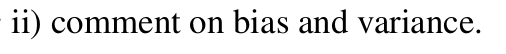

As we can see in both k = 3 and p =  3 as well as k= 5 and p = 5 its generalized i.e. neither high bias neither high variance however its going to be very high biased if we take k = 1 and p = 1 , also for k = 10 and p = 10 its very high biased as we can see the test error >> train error


we can also visualize the same from the graphs ( overfitting and underfiiting)

Prediction error vs p ( k = constant , lets say = 5 )